<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/ANN_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Meilleurs hyperparamètres trouvés :
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Mean Squared Error on test set with best model: 55.01349985787437


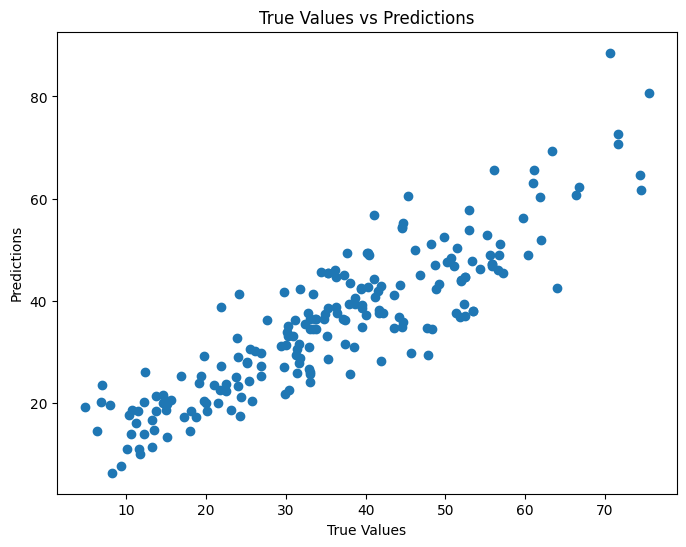

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Charger les données depuis le fichier Excel
data = pd.read_excel('Concrete_Data.xls')

#renaming all featurses
data.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

# Diviser les données en variables d'entrée (X) et variable cible (y)
X = data[['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age']]
y = data['strength']

# Normaliser les variables d'entrée
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer un dictionnaire des hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(10,), (10,5),],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000],
}

# Créer le modèle MLPRegressor
mlp = MLPRegressor(random_state=42)

# Recherche par grille des meilleurs hyperparamètres
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set with best model: {mse}")

# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


In [ ]:
# Recherche aléatoire des meilleurs hyperparamètres
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés :")
print(random_search.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set with best model: {mse}")

Meilleurs hyperparamètres trouvés :
{'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 5), 'alpha': 0.01, 'activation': 'relu'}
Mean Squared Error on test set with best model: 55.01349985787437


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Récupérer les résultats de la recherche aléatoire
results = pd.DataFrame(random_search.cv_results_)

# Créer une fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(param_name, param_values, train_scores_mean, test_scores_mean, param_title):
    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel(param_name)
    plt.ylabel('Mean Squared Error')
    train_sizes = np.arange(len(train_scores_mean))
    plt.grid()

    plt.plot(param_values, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(param_values, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

    plt.legend(loc='best')
    plt.title('Learning Curve - ' + param_title)
    plt.show()

# Extraire les données pour les courbes d'apprentissage
param_name = 'param_' + results.columns[results.columns.str.startswith('param_')][0]
param_values = results[param_name]
train_scores_mean = -results['mean_train_score']
test_scores_mean = -results['mean_test_score']

# Tracer les courbes d'apprentissage
plot_learning_curve(param_name, param_values, train_scores_mean, test_scores_mean, 'MLPRegressor')

KeyError: ignored

In [ ]:
# Récupérer les résultats de la recherche aléatoire
results = pd.DataFrame(random_search.cv_results_)

# Sélectionner les colonnes pertinentes pour afficher dans le tableau
columns_to_display = ['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate', 'param_max_iter', 'mean_test_score']
table = results[columns_to_display].sort_values(by='mean_test_score', ascending=True)

# Renommer la colonne mean_test_score en mse
table.rename(columns={'mean_test_score': 'MSE'}, inplace=True)

# Afficher le tableau avec les hyperparamètres et les performances associées
print(table)

  param_hidden_layer_sizes param_activation param_solver param_alpha  \
1                    (10,)             tanh         adam        0.01   
2                    (10,)             tanh         adam       0.001   
4                    (10,)             tanh         adam       0.001   
3                  (10, 5)             tanh         adam        0.01   
8                    (10,)             relu         adam       0.001   
6                    (10,)             relu         adam        0.01   
5                    (10,)             tanh         adam        0.01   
0                    (10,)             tanh         adam       0.001   
9                    (10,)             tanh         adam       0.001   
7                  (10, 5)             relu         adam        0.01   

  param_learning_rate param_max_iter         MSE  
1            adaptive            500 -424.247641  
2          invscaling            500 -424.245678  
4            constant            500 -424.245678  
3  